In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['Target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X=df.drop(['Target'],axis='columns')
y=df['Target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
def get_score(n_estimators,X_train,X_test,y_train,y_test):
  model=RandomForestClassifier(n_estimators=n_estimators)
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)

In [10]:
for i in range(10,60,10):
  model_score=get_score(i,X_train,X_test,y_train,y_test)
  print(f"Estimator: {i} \t Model Score: {model_score}")

Estimator: 10 	 Model Score: 1.0
Estimator: 20 	 Model Score: 1.0
Estimator: 30 	 Model Score: 1.0
Estimator: 40 	 Model Score: 1.0
Estimator: 50 	 Model Score: 1.0


All the estimators are giving best model score, hence we choose the least i.e. **10**

In [11]:
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

Fit a Random forest model with 10 estimators

In [12]:
y_predicted=model.predict(X_test)

Predictions made based on the test values

<Axes: >

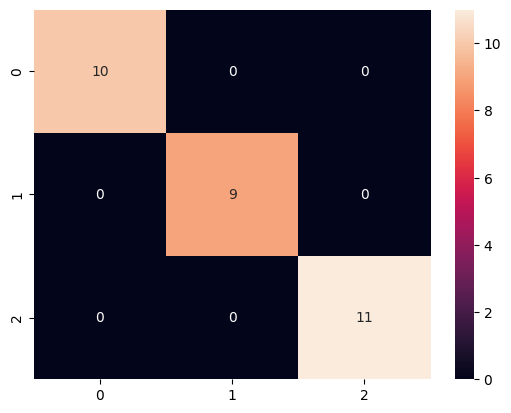

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='g')

From the Confusion Matrix, it is evident that the model is pretty accurate